In [1]:
from sklearn import datasets 
 
circles_data, circles_data_labels = datasets.make_circles(n_samples=100, factor=0.1, noise=0.1) 

In [2]:
circles_data_labels

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [3]:
from sklearn.model_selection import train_test_split

def split_dataset(data, labels, train_size):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=train_size, random_state=42)
    return X_train, X_test, y_train, y_test

train_size = 0.7
X_train, X_test, y_train, y_test = split_dataset(circles_data, circles_data_labels, train_size)

print("Training set size:", len(X_train), len(y_train))
print("Test set size:", len(X_test), len(y_test))


Training set size: 70 70
Test set size: 30 30


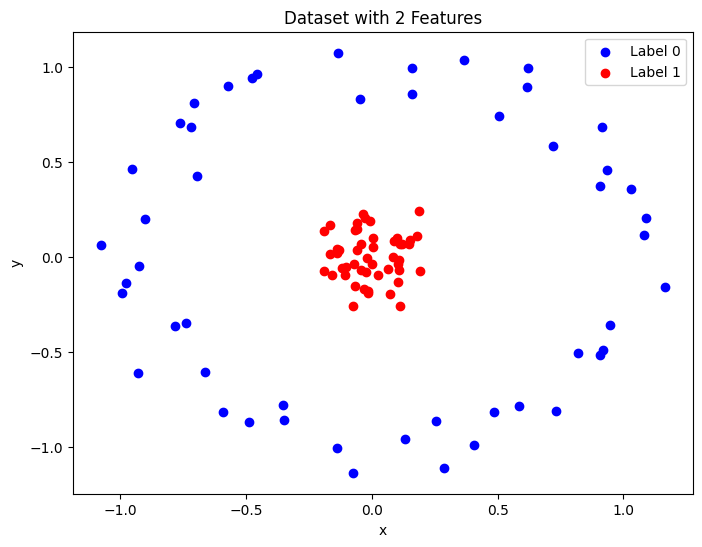

In [4]:
import matplotlib.pyplot as plt

def plot_data(features, labels):
    blue_points = features[labels == 0]
    red_points = features[labels == 1]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Label 0')
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Label 1')
    
    plt.title('Dataset with 2 Features')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

plot_data(circles_data, circles_data_labels)


In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

class SimpleNN(nn.Module):
    def __init__(self, channel):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, channel)  # 2 input features
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(channel, 1)  # Binary classification, output 1 value
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x



In [33]:
X = torch.Tensor(circles_data)
y = torch.Tensor(circles_data_labels).view(-1, 1)  # Reshape for consistency with output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training, 30% testing

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

print("Training set size:", len(train_dataset))
print("Test set size:", len(test_dataset))

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


Training set size: 70
Test set size: 30


In [94]:
circles_data.shape, circles_data_labels.shape

((100, 2), (100,))

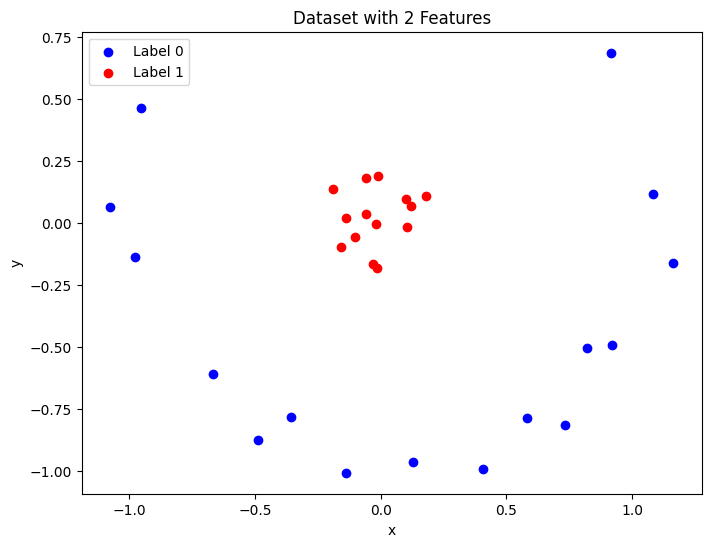

In [98]:
import torch

def get_all_features_labels(dataloader):
    all_features = []
    all_labels = []

    for features, labels in dataloader:
        all_features.append(features)
        all_labels.append(labels)

    # Concatenate all features and labels along the first dimension
    all_features = torch.cat(all_features, dim=0)
    all_labels = torch.cat(all_labels, dim=0)

    return all_features, all_labels

all_features, all_labels = get_all_features_labels(test_loader)
plot_data(all_features, all_labels.flatten())


In [96]:
all_features.shape, all_labels.flatten().shape

(torch.Size([70, 2]), torch.Size([70]))

[tensor([[ 0.9349,  0.4559],
         [ 0.4852, -0.8172],
         [ 0.1103, -0.2573],
         [ 0.1573,  0.9946],
         [-0.9927, -0.1902],
         [ 0.1059, -0.0714],
         [ 0.5045,  0.7421],
         [-0.0655, -0.1528],
         [-0.1399,  0.0403],
         [-0.7189,  0.6856],
         [ 0.7214,  0.5841],
         [-0.1670,  0.0155],
         [ 0.3652,  1.0392],
         [-0.1892, -0.0744],
         [-0.0593,  0.1494],
         [-0.7844, -0.3650]]),
 tensor([[0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [1.],
         [0.],
         [1.],
         [1.],
         [0.],
         [0.],
         [1.],
         [0.],
         [1.],
         [1.],
         [0.]])]

In [99]:
model = SimpleNN(10)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

epochs = 1000
for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

    if epoch % 10 == 9:  # Print every 10 epochs
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')


Epoch 10/1000, Loss: 0.5742407441139221
Epoch 20/1000, Loss: 0.6093273758888245
Epoch 30/1000, Loss: 0.6482698321342468
Epoch 40/1000, Loss: 0.5902791619300842
Epoch 50/1000, Loss: 0.5522056221961975
Epoch 60/1000, Loss: 0.7067620754241943
Epoch 70/1000, Loss: 0.527377188205719
Epoch 80/1000, Loss: 0.4696003496646881
Epoch 90/1000, Loss: 0.607799232006073
Epoch 100/1000, Loss: 0.4952283799648285
Epoch 110/1000, Loss: 0.4869246184825897
Epoch 120/1000, Loss: 0.4173370897769928
Epoch 130/1000, Loss: 0.4898613393306732
Epoch 140/1000, Loss: 0.413120299577713
Epoch 150/1000, Loss: 0.39848148822784424
Epoch 160/1000, Loss: 0.36839139461517334
Epoch 170/1000, Loss: 0.3507160246372223
Epoch 180/1000, Loss: 0.29944491386413574
Epoch 190/1000, Loss: 0.21465331315994263


Epoch 200/1000, Loss: 0.2965991199016571
Epoch 210/1000, Loss: 0.21881787478923798
Epoch 220/1000, Loss: 0.1731172800064087
Epoch 230/1000, Loss: 0.24588410556316376
Epoch 240/1000, Loss: 0.1921512335538864
Epoch 250/1000, Loss: 0.24556787312030792
Epoch 260/1000, Loss: 0.11308110505342484
Epoch 270/1000, Loss: 0.14274244010448456
Epoch 280/1000, Loss: 0.12286144495010376
Epoch 290/1000, Loss: 0.11599424481391907
Epoch 300/1000, Loss: 0.13197235763072968
Epoch 310/1000, Loss: 0.14005227386951447
Epoch 320/1000, Loss: 0.07445114850997925
Epoch 330/1000, Loss: 0.10767185688018799
Epoch 340/1000, Loss: 0.1121315062046051
Epoch 350/1000, Loss: 0.13117460906505585
Epoch 360/1000, Loss: 0.10508973151445389
Epoch 370/1000, Loss: 0.06595087796449661
Epoch 380/1000, Loss: 0.08251345902681351
Epoch 390/1000, Loss: 0.05315762758255005
Epoch 400/1000, Loss: 0.06542493402957916
Epoch 410/1000, Loss: 0.05546954646706581
Epoch 420/1000, Loss: 0.0739259198307991
Epoch 430/1000, Loss: 0.068169601261615

In [100]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            predicted = (outputs.data > 0.5).float()  # Convert probabilities to binary predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Assuming you have a test_loader which is a DataLoader object for your test dataset
test_accuracy = evaluate_model(model, test_loader)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Test Accuracy: 100.00%


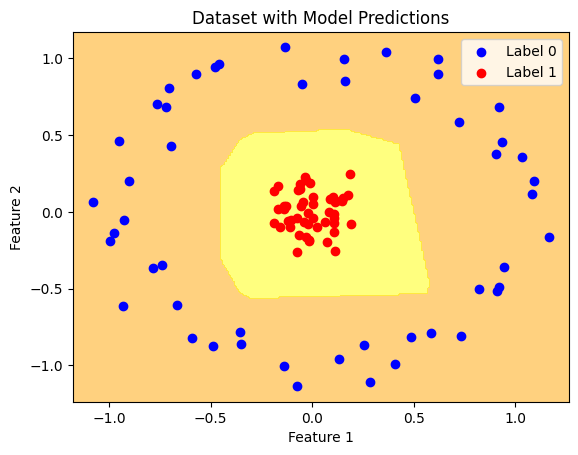

In [101]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data_with_predictions(model, features, labels):
    
    # Generate a mesh grid to plot decision boundary
    x_min, x_max = features[:, 0].min() - 0.1, features[:, 0].max() + 0.1
    y_min, y_max = features[:, 1].min() - 0.1, features[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict over the mesh grid
    model.eval()
    with torch.no_grad():
        Z = model(torch.Tensor(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        Z = (Z > 0.5).float()  # Convert to binary predictions

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.5, levels=[-1, 0.5, 2], colors=['orange', 'yellow'])
    plt.scatter(features[labels == 0, 0], features[labels == 0, 1], c='blue', label='Label 0')
    plt.scatter(features[labels == 1, 0], features[labels == 1, 1], c='red', label='Label 1')

    plt.title('Dataset with Model Predictions')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

plot_data_with_predictions(model, circles_data, circles_data_labels)
